In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "/notebooks/data/"

In [8]:
sz=64
bs=64
arch=resnext101

In [9]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name='train_1', val_name='train_2', test_name='test')

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 4674/4674 [07:08<00:00, 10.91it/s]


In [11]:
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.08364    0.103193   0.969641  
    1      0.08722    0.098033   0.969985  



[array([0.09803]), 0.969984712878623]

In [12]:
learn.save('12_PRETRUE')

In [13]:
lrf=learn.lr_find()

 81%|████████  | 1876/2320 [00:23<00:05, 80.18it/s, loss=0.243]

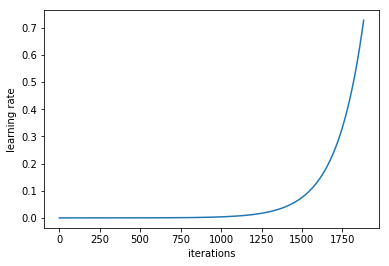

In [14]:
learn.sched.plot_lr()

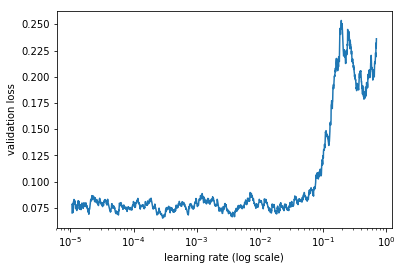

In [15]:
learn.sched.plot()

In [16]:
learn.precompute=False

In [17]:
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.091872   0.096369   0.970638  


[array([0.09637]), 0.9706379511220182]

In [18]:
learn.save('12_PREFALSE')

In [19]:
learn.load('12_PREFALSE')

In [25]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name='train_3', val_name='train_4', test_name='test')

In [26]:
learn = ConvLearner.pretrained(arch, data, precompute=False, pretrained=False)

In [27]:
learn.load('12_PREFALSE')

In [28]:
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.095791   0.075204   0.978621  


[array([0.0752]), 0.9786213678540621]

In [29]:
learn.save('34_PREFALSE')

In [30]:
learn.load('34_PREFALSE')

In [31]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name='train_2', val_name='train_3', test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=False, pretrained=False)

In [32]:
learn.load('34_PREFALSE')

In [33]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.101874   0.08969    0.972609  
    1      0.108727   0.089494   0.972764  


[array([0.08949]), 0.9727635105140043]

In [34]:
learn.save('23_PREFALSE')

In [35]:
learn.load('23_PREFALSE')

In [36]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name='train_4', val_name='train_1', test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=False, pretrained=False)

In [37]:
learn.load('23_PREFALSE')

In [38]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.074893   0.072966   0.978734  
    1      0.083379   0.07361    0.978747  


[array([0.07361]), 0.9787470528811628]

In [39]:
learn.save('41_PREFALSE')

In [40]:
learn.load('41_PREFALSE')

In [41]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)

In [42]:
probs.shape

(299135, 2)

In [43]:
probs[:10]

array([[0.9981 , 0.0019 ],
       [0.99481, 0.00519],
       [0.9979 , 0.0021 ],
       [0.99628, 0.00372],
       [0.0987 , 0.9013 ],
       [0.99837, 0.00163],
       [0.99863, 0.00137],
       [0.98494, 0.01506],
       [0.99896, 0.00104],
       [0.99917, 0.00083]], dtype=float32)

In [52]:
target=[]
for a, b in probs:
    if a > 0.98:
        target.append(0)
    else:
        target.append(1)

In [53]:
len(target)

299135

In [54]:
target[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [55]:
df2 = pd.DataFrame(target)

In [56]:
[o[5:-3]+'tif' for o in data.test_ds.fnames][:10]

['test_000000.tif',
 'test_000001.tif',
 'test_000002.tif',
 'test_000003.tif',
 'test_000004.tif',
 'test_000005.tif',
 'test_000006.tif',
 'test_000007.tif',
 'test_000008.tif',
 'test_000009.tif']

In [49]:
df2.insert(0, 'id', [o[5:-3]+'tif' for o in data.test_ds.fnames])

In [57]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df2.to_csv(f'{SUBM}subm5.csv', index=False, header=False)